## import

In [25]:
# To embed plots in the notebooks
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # numpy library
import scipy . linalg as lng # linear algebra from scipy library
from scipy . spatial import distance # load distance function
from sklearn import preprocessing as preproc # load preprocessing function

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

## Load dataset

In [26]:
diabetPath = './DiabetesDataNormalized.txt'
T = np.loadtxt(diabetPath, delimiter = ' ', skiprows = 1)
y = T[:, 10]
X = T[:,:10]

# Get number of observations (n) and number of independent variables (p)
[n, p] = np.shape(X)

## 3 Solve the Rigde regression problem and examine Bias and Variance for Ridge:

> (a) Derive (using pen and paper) the ridge regression solution by, as you would when minimizing any differentiable analytical function, differentiating $∥{\bf y} − {\bf X}β∥ + ∥β∥_2$ with respect to $β$, setting to zero and solving for $β$. That is, solve
$\frac{∂}{∂β} [∥y−Xβ∥_2^2+λ∥β∥_2^2]= 0$ for $β$.

> (b) Compute ridge-regression solutions for the diabetes data set for 100 values of the regularization parameter in the range $10^{−4}$ to $10^3$. Plot the solutions as a function of this parameter. In the next lecture you will learn how to choose a single parameter value which suits the problem at hand.

C:\Users\musti\AppData\Local\Temp\ipykernel_49724\191176451.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


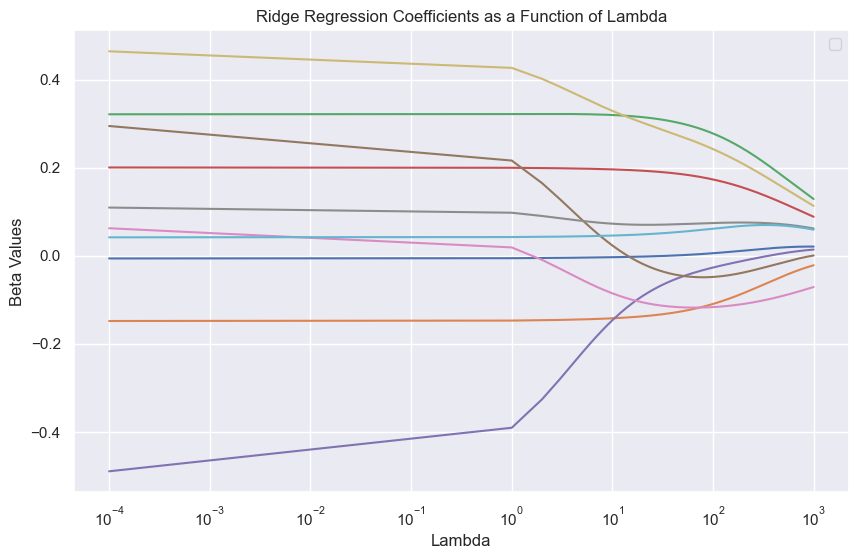

In [27]:
# Create a method that computes the betas in ridge regression analytically
# given the design matrix, lambdas, number of independent variables
# and dependent values
def ridgeMulti(X, _lambda, p, y):
    xt= np.transpose(X)
    return lng.inv(np.dot(xt,X) + _lambda*np.identity(p)).dot(xt.dot(y))


k = 1000; # try k values of lambda
# make list of lambda values. 
lambdas = np.linspace(10**(-4), 1000,k)
# run ridge for all lambda values
ridges = np.zeros((p,k))
for i in range(k):
    ridges[:, i] = ridgeMulti(X, lambdas[i], p, y)
# ridges = [ridgeMulti(X, l, p, y) for l in lambdas]
# ridges = np.array(ridges).squeeze()
# plot results
plt.figure(figsize=(10, 6))
plt.semilogx(lambdas, ridges.T )
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Beta Values')
plt.title('Ridge Regression Coefficients as a Function of Lambda')
plt.legend()
plt.show()

How does the parameter estimates change when the regularization parameter increase?

What does this mean in terms of the bias of the model?


> (c) Change the experiment in exercise 2 to investigate bias and variance for ridge regression instead of OLS. Can you lower the variance without introducing too much bias?

In [28]:
# recreate the experiment from the last exercise
# you can reuse the code with some edits, and do similar plots to investigate
# the bias and variance of ridge

def estimate_betas(X, beta_true, sigma, _lambda):
    """

    Parameters:
    X (nXp matrix): feature matrix used for simulation
    true_betas (array): array of ture betas
    sigma (float): The noise level in the simulation
    _lambda (float): The trade-off parameter for ridge regression

    Returns:
    beta: the estimated betas

   """
    variance = 1.0
    mu = 0.0

    y_= X.dot(beta_true) + np.random.normal(0, sigma, X.shape[0])
    
    y = np.matmul(X, beta_true) + np.random.normal(mu, sigma, size=n) # Measures response - true value plus noise level
    beta = ridgeMulti(X, _lambda, p, y) # Estimates

    return beta    

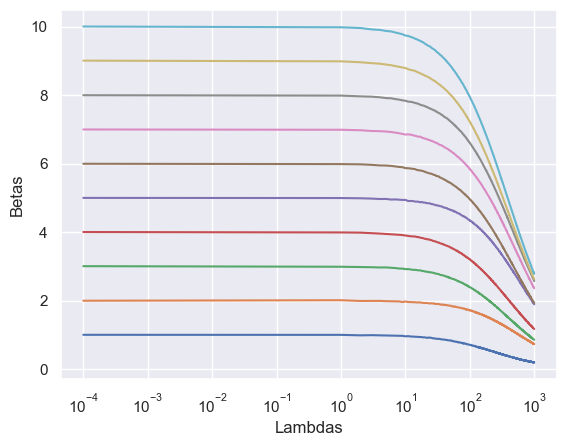

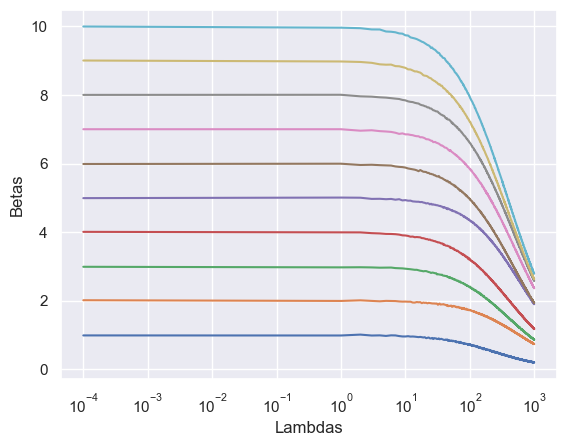

In [29]:
# define true betas, n and p, and sigma
B_true = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# Create a feature matrix either using np.random.normal or np.rand.randn
X_rand = np.random.randn(n, p)
m = 100 # number of experiments
betas = np.zeros((k,p, m)) # all variable estimates
# call the method you just created 100 times and save the estimated betas
for i in range (1,3):
    sigma = i
    for j in range(k):
        _lambda = lambdas[j]
        for l in range(m):
            betas[j, :, l] = estimate_betas(X_rand, B_true, sigma, _lambda)

# Investigate the mean and variance of the betas that you have estimated from experiments with different noise levels
    betas_mean = np.mean(betas, axis = 2)
    plt.figure()
    plt.semilogx(lambdas, betas_mean)
    plt.xlabel("Lambdas")
    plt.ylabel("Betas")
    plt.show()

What happens with the bias and variance as the regularization parameter increase?